## Visión general

In [30]:
import pandas as pd

df = pd.read_csv("https://media.githubusercontent.com/media/elkofix/cardiac-risk-db/refs/heads/master/completa.csv", sep=',')

In [2]:
df.shape

(2782908, 29)

In [3]:
df.head()

,11_CodEtnia_Indigena,11_CodEtnia_Negro,11_CodEtnia_Otro,11_CodEtnia_Palenquero de San Basilio,11_CodEtnia_ROM (Gitano),11_CodEtnia_Raizal,ENDOSALUD_SI,Indice Masa Corporal = Peso/talla Al Cuadrado,24_Talla,23_Peso,...,9_Regimen_SUBSIDIADO,18_DxHTA_SI,18_DxHTA_NO,22_EtiologiaERC_HTA,22_EtiologiaERC_DM,CLASIFICACION FINAL DEL RIESGO_ALTO,CLASIFICACION FINAL DEL RIESGO_BAJO,CLASIFICACION FINAL DEL RIESGO_MODERADO,20_DxDM_SI,CLASIFICACION FINAL DEL RIESGO_MUY ALTO
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26.892323,167.0,75.0,...,1,1,0,1,0,0,1,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,31.250000,160.0,80.0,...,1,1,0,1,0,0,0,1,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.690405,161.0,64.0,...,1,1,0,1,0,0,0,1,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.000000,160.0,64.0,...,0,1,0,0,0,1,0,0,1,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.437500,160.0,60.0,...,1,0,1,0,1,1,0,0,1,0


In [4]:
df.dtypes

,0
11_CodEtnia_Indigena,float64
11_CodEtnia_Negro,float64
11_CodEtnia_Otro,float64
11_CodEtnia_Palenquero de San Basilio,float64
11_CodEtnia_ROM (Gitano),float64
11_CodEtnia_Raizal,float64
ENDOSALUD_SI,float64
Indice Masa Corporal = Peso/talla Al Cuadrado,float64
24_Talla,float64
23_Peso,float64


En este caso identifico que hay muchas variables categóricas que estan almancenadas como int64 y float64, es significa que para cada uno de los valores estoy usando 8 bytes, sin embargo solo necesito representar unos y ceros, por lo que una opción es pasar las variables binarias a booleanos, que solo ocupan 1 byte por valor.

In [31]:
bin_cols = [col for col in df.columns if set(df[col].unique()) <= {0, 1}]
df[bin_cols] = df[bin_cols].astype('bool')

In [32]:
df.dtypes

,0
11_CodEtnia_Indigena,bool
11_CodEtnia_Negro,bool
11_CodEtnia_Otro,bool
11_CodEtnia_Palenquero de San Basilio,bool
11_CodEtnia_ROM (Gitano),bool
11_CodEtnia_Raizal,bool
ENDOSALUD_SI,bool
Indice Masa Corporal = Peso/talla Al Cuadrado,float64
24_Talla,float64
23_Peso,float64


In [33]:
import pandas as pd

def resumen_dataframe(df):
    numericas = df.select_dtypes(include=['float64'])
    resumen_numericas = numericas.describe().T

    categoricas = df.select_dtypes(include=['bool'])
    valores_unicos = categoricas.nunique()

    print("Resumen de variables numéricas")
    display(resumen_numericas)
    print("\nValores únicos en categóricas/bool")
    display(valores_unicos)

    return {
        'numericas': resumen_numericas,
        'categoricas': valores_unicos
    }

resumen = resumen_dataframe(df)

Resumen de variables numéricas


,count,mean,std,min,25%,50%,75%,max
Indice Masa Corporal = Peso/talla Al Cuadrado,2782908.0,28.497291,21.139211,0.0,24.609734,27.688778,31.25,6500.0
24_Talla,2782908.0,161.994512,8.483833,10.0,157.000000,162.000000,168.00,260.0
23_Peso,2782908.0,74.417583,15.463369,0.0,64.000000,73.000000,83.00,258.0
25_TenArtSis,2782908.0,125.383537,15.510102,0.0,120.000000,120.000000,130.00,270.0
26_TenArtDitlica,2782908.0,77.872443,9.051994,0.0,70.000000,80.000000,80.00,191.0
EDAD (Años cumplidos),2782908.0,63.378973,14.567678,6.0,54.000000,64.000000,74.00,115.0



Valores únicos en categóricas/bool


,0
11_CodEtnia_Indigena,2
11_CodEtnia_Negro,2
11_CodEtnia_Otro,2
11_CodEtnia_Palenquero de San Basilio,2
11_CodEtnia_ROM (Gitano),2
11_CodEtnia_Raizal,2
ENDOSALUD_SI,2
36_RcbeIECA_SI,2
37_RcbeARA2_SI,2
22_EtiologiaERC_HTA-DM,2


Al revisar las variables principales veo que hay varios errores o valores extremos que claramente no son realistas:  

**IMC (Indice de Masa Corporal):** la media está alrededor de 28, lo que tiene sentido para una población con sobrepeso leve. Sin embargo, el mínimo es 0 y el máximo 6500, lo cual es imposible. Probablemente hay registros mal calculados, quizá la talla estaba en cm y no se convirtió a metros. Valores realistas deberían estar entre 10 y 60.  

**Talla (cm):** la media es ~162 cm, bastante lógica. Pero hay valores mínimos de 10 cm y máximos de 260 cm. 10 cm es claramente un error y 260 cm sería un caso extraordinario (la persona más grande en colombia mide 235 cm).

**Peso (kg):** la media es ~74 kg, coherente. Sin embargo, hay registros de 0 kg (error) y hasta 258 kg, que aunque posible, es extremadamente raro. La mayoría de los casos deberían estar entre 30 y 200 kg.  

**Tensión arterial sistólica (mmHg):** media de ~125 mmHg, lógica. Min=0 (imposible) y máx=270 mmHg, extremadamente alto. Valores normales suelen estar entre 90 y 200 mmHg.  

**Tensión arterial diastólica (mmHg):** media ~78 mmHg, normal. Min=0 y máx=191 mmHg, que es casi incompatible con la vida, claramente valores atípicos.  

**Edad (años):** media ~63 años, coherente. Mínimo de 6 años sugiere que hay niños incluidos y máximo de 115 años, posible pero muy poco frecuente.  

En general, estos datos necesitan limpieza: muchos ceros, máximos imposibles y outliers que pueden distorsionar análisis posteriores.


## Variable Escogida

### Presión arterial sistólica

La presión arterial sistólica es un predictor clave del riesgo cardiovascular porque refleja la fuerza con la que el corazón bombea sangre hacia las arterias y, por tanto, el grado de tensión que soporta el sistema vascular en cada latido. Su elevación sostenida se asocia directamente con daño en las paredes arteriales, rigidez vascular y desarrollo de aterosclerosis, lo que incrementa la probabilidad de infarto, accidente cerebrovascular y otras complicaciones cardiovasculares. Además, numerosos estudios epidemiológicos han demostrado que la presión sistólica, especialmente en adultos mayores, discrimina mejor el riesgo que la diastólica, por lo que se considera un indicador clínico prioritario en la evaluación y predicción de enfermedades del corazón y los vasos sanguíneos.

In [34]:
errores_sis_dia = df[df['25_TenArtSis'] <= df['26_TenArtDitlica']]
print(errores_sis_dia[['25_TenArtSis', '26_TenArtDitlica']])

         25_TenArtSis  26_TenArtDitlica
50465           111.0             111.0
51796           111.0             111.0
52304           111.0             111.0
63386           107.0             111.0
65030           111.0             111.0
...               ...               ...
2778726         110.0             110.0
2779947          90.0              90.0
2780077          80.0              80.0
2780554           0.0              90.0
2781920           0.0              60.0

[321 rows x 2 columns]


In [35]:
df = df.drop(errores_sis_dia.index)

Como la presión sistólica siempre debe ser mayor a la diastólica entonces elimino datos que tengan ese error

In [37]:
df= df[(df['25_TenArtSis'] != 0)]

In [38]:
df = df[(df['25_TenArtSis'] >= 70) & (df['25_TenArtSis'] <= 250)z]

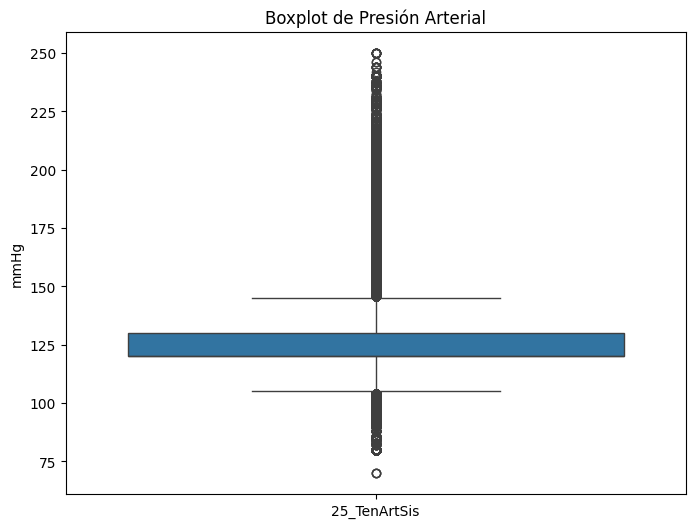

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['25_TenArtSis']])
plt.title('Boxplot de Presión Arterial')
plt.ylabel('mmHg')
plt.show()


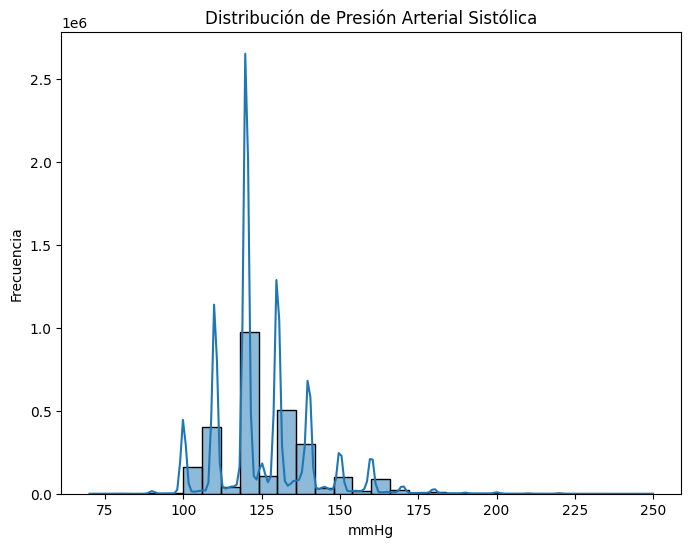

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df['25_TenArtSis'], bins=30, kde=True)  # bins=30 ajusta el número de barras
plt.title('Distribución de Presión Arterial Sistólica')
plt.xlabel('mmHg')
plt.ylabel('Frecuencia')
plt.show()

Al examinar el histograma de la distribución de la presión arterial sistólica, identifico un claro patrón de sesgo por preferencia de dígito, también conocido como sesgo de redondeo. Este sesgo se evidencia al observar que las barras de frecuencia más altas se concentran de manera desproporcionada en valores que terminan en cero, como 120, 130 y 140 mmHg, en lugar de mostrar una distribución más uniforme y suave a lo largo del eje X. La presencia de estos picos agudos en números redondos, en contraste con las frecuencias mucho más bajas en los valores intermedios (por ejemplo, 121, 122, 128 mmHg), sugiere fuertemente que quienes tomaron las mediciones tendían a redondear sus lecturas al múltiplo de diez más cercano.

In [14]:
def contar_atipicos(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    atipicos = columna[(columna < Q1 - 1.5*IQR) | (columna > Q3 + 1.5*IQR)]
    return len(atipicos)

sis_atipicos = contar_atipicos(df['25_TenArtSis'])

print(f"Atípicos en Tensión Sistólica: {sis_atipicos}")


Atípicos en Tensión Sistólica: 431435


In [15]:
df.shape

(2782521, 32)

In [16]:
resumen = resumen_dataframe(df)

Resumen de variables numéricas


,count,mean,std,min,25%,50%,75%,max
Indice Masa Corporal = Peso/talla Al Cuadrado,2782521.0,28.497348,21.140592,0.0,24.609734,27.688778,31.25,6500.0
24_Talla,2782521.0,161.994478,8.484003,10.0,157.000000,162.000000,168.00,260.0
23_Peso,2782521.0,74.417634,15.463428,0.0,64.000000,73.000000,83.00,258.0
25_TenArtSis,2782521.0,125.385169,15.490698,70.0,120.000000,120.000000,130.00,250.0
26_TenArtDitlica,2782521.0,77.868641,9.040116,40.0,70.000000,80.000000,80.00,150.0
EDAD (Años cumplidos),2782521.0,63.378979,14.567968,6.0,54.000000,64.000000,74.00,115.0



Valores únicos en categóricas/bool


,0
11_CodEtnia_Indigena,2
11_CodEtnia_Negro,2
11_CodEtnia_Otro,2
11_CodEtnia_Palenquero de San Basilio,2
11_CodEtnia_ROM (Gitano),2
11_CodEtnia_Raizal,2
ENDOSALUD_SI,2
36_RcbeIECA_SI,2
37_RcbeARA2_SI,2
22_EtiologiaERC_HTA-DM,2


# Resumen del Análisis y Pasos a Seguir
El **análisis de la presión arterial sistólica** nos deja una hallazgo clave: la presencia de un sesgo por preferencia de dígito. Esto se nota al observar cómo las mediciones no se distribuyen de manera uniforme, sino que se agrupan de forma artificial en valores redondos como 120, 130 y 140 mmHg. Esto indica que, durante la recolección de datos, existió una tendencia generalizada a redondear las cifras en lugar de registrar el valor exacto.

Este junto al trabajo de limpieza, en el que fue necesario corregir el conjunto de datos eliminando registros con errores claros, como valores de presión sistólica inferiores a la diastólica y mediciones que caían fuera de un rango clínicamente lógico. Después de esta limpieza, en el análisis se detectó la existencia de valores atípicos que, aunque plausibles, se alejan considerablemente de la tendencia central.

El sesgo de redondeo puede llevar a una clasificación clínica incorrecta de los pacientes, donde una lectura real de 139 mmHg (prehipertensión) podría registrarse como 140 mmHg, catalogando erróneamente al individuo en una etapa de hipertensión. Esto, a su vez, podría afectar la validez de modelos predictivos que se construya a partir de estos datos.

De cara al futuro, sería ideal revisar los protocolos de recolección de datos para minimizar este tipo de sesgo, quizás promoviendo el uso de tensiómetros digitales que registren las cifras de forma automática para evitar el error humano. Además, sería importante investigar los valores atípicos detectados para comprender si corresponden a errores o a casos clínicos severos. .

# Bivariado

## Evaluación

In [18]:
def unificar_riesgo(row):
    if row.get('CLASIFICACION FINAL DEL RIESGO_MUY ALTO', 0) == 1:
        return 'MUY ALTO'
    elif row.get('CLASIFICACION FINAL DEL RIESGO_ALTO', 0) == 1:
        return 'ALTO'
    elif row.get('CLASIFICACION FINAL DEL RIESGO_MODERADO', 0) == 1:
        return 'MODERADO'
    elif row.get('CLASIFICACION FINAL DEL RIESGO_BAJO', 0) == 1:
        return 'BAJO'
    else:
        return 'DESCONOCIDO'

df['Riesgo'] = df.apply(unificar_riesgo, axis=1)

columnas_riesgo = [
    'CLASIFICACION FINAL DEL RIESGO_ALTO',
    'CLASIFICACION FINAL DEL RIESGO_BAJO',
    'CLASIFICACION FINAL DEL RIESGO_MODERADO',
    'CLASIFICACION FINAL DEL RIESGO_MUY ALTO'
]
df = df.drop(columns=columnas_riesgo)

In [19]:
from sklearn.preprocessing import StandardScaler

columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Riesgo_num'] = le.fit_transform(df['Riesgo'])

correlacion_riesgo = df[columnas_numericas + ['Riesgo_num']].corr()['Riesgo_num'].sort_values(ascending=False)
print(correlacion_riesgo)


Riesgo_num                                       1.000000
25_TenArtSis                                     0.090557
26_TenArtDitlica                                 0.081624
EDAD (Años cumplidos)                            0.028579
24_Talla                                         0.002068
Indice Masa Corporal = Peso/talla Al Cuadrado   -0.005602
23_Peso                                         -0.016459
Name: Riesgo_num, dtype: float64


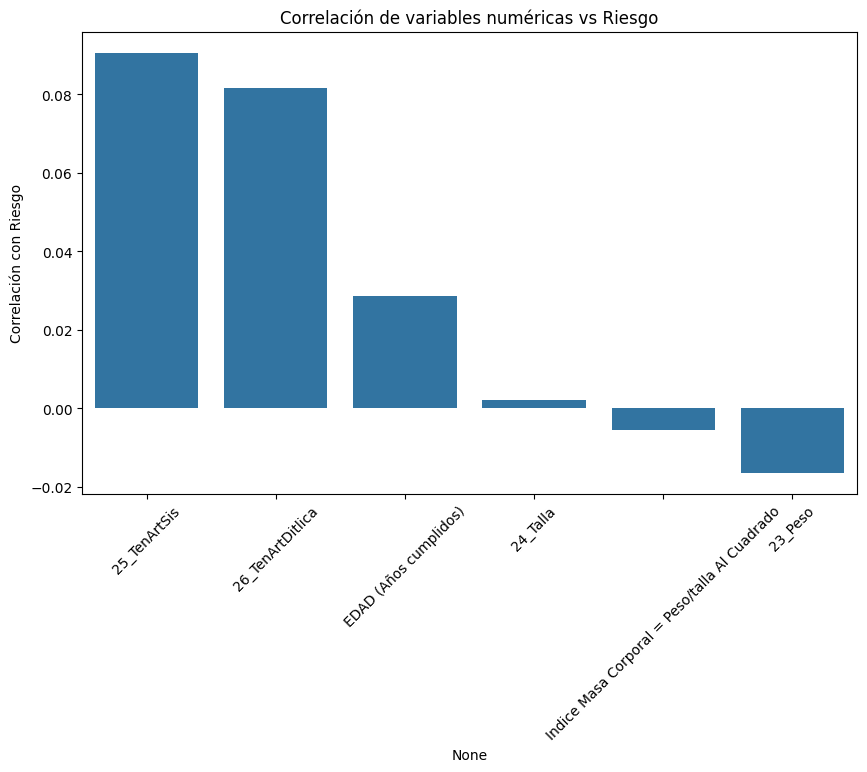

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x=correlacion_riesgo.index[1:],
    y=correlacion_riesgo.values[1:]
)
plt.xticks(rotation=45)
plt.ylabel("Correlación con Riesgo")
plt.title("Correlación de variables numéricas vs Riesgo")
plt.show()


In [23]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()
categoricas.remove('Riesgo')

df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

le = LabelEncoder()
y = le.fit_transform(df_encoded['Riesgo'])

X = df_encoded.drop(columns=['Riesgo', 'Riesgo_num'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(
    n_estimators=40,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

sample_size = 10000
posiciones = np.random.choice(len(X_test), size=sample_size, replace=False)

X_test_sample = X_test.iloc[posiciones]
y_test_sample = y_test[posiciones]

perm_importance = permutation_importance(
    model,
    X_test_sample,
    y_test_sample,
    n_repeats=3,
    random_state=42,
    n_jobs=1
)

# Ordenar resultados
importancia = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': perm_importance.importances_mean
}).sort_values(by='Importancia', ascending=False)

print(importancia.head(20))


                                         Variable  Importancia
15                          EDAD (Años cumplidos)     0.239500
10                                   25_TenArtSis     0.224000
11                               26_TenArtDitlica     0.133000
13                                 37_RcbeARA2_SI     0.128933
7   Indice Masa Corporal = Peso/talla Al Cuadrado     0.126500
8                                        24_Talla     0.124033
9                                         23_Peso     0.120700
16                                       8_Sexo_F     0.098700
12                                 36_RcbeIECA_SI     0.062900
27                        clase_edad_Adulto Mayor     0.030500
22                            22_EtiologiaERC_HTA     0.029500
1                               11_CodEtnia_Negro     0.028800
2                                11_CodEtnia_Otro     0.024233
14                         22_EtiologiaERC_HTA-DM     0.002467
0                            11_CodEtnia_Indigena     0

## Limpieza

### Altura

In [ ]:
num_ninos = df[df['EDAD (Años cumplidos)'] < 18].shape[0]
print("Número de niños en el dataset:", num_ninos)

num_adultos = df[df['EDAD (Años cumplidos)'] >= 18].shape[0]
print("Número de adultos en el dataset:", num_adultos)

Número de niños en el dataset: 2303
Número de adultos en el dataset: 2780605


In [ ]:
df= df[df['EDAD (Años cumplidos)'] >= 18].copy()
print("Número de registros ahora:", df.shape[0])

Número de registros ahora: 2780605


Teniendo en cuenta que la participación de niños en el dataset es muy baja y que la prevalencia de riesgo cardiovascular en niños es mucho menor, con el objetivo de limpiar el dataset y evitar sesgos en el mismo, decido eliminar a la población de niños del dataset

In [ ]:
# Uso un rango arbitrario, porque al usar el rango intercuartil, me da valores completamente normales, como atípicos
# altura_col = '24_Talla'
# peso_col = '23_Peso'

# Q1_altura = df[altura_col].quantile(0.25)
# Q3_altura = df[altura_col].quantile(0.75)
# IQR_altura = Q3_altura - Q1_altura

# alturas_sospechosas = df[(df[altura_col] < Q1_altura - 1.5*IQR_altura) |
#                          (df[altura_col] > Q3_altura + 1.5*IQR_altura)]

# print(alturas_sospechosas[[altura_col, peso_col]])
# print("Número de valores atípicos:", alturas_sospechosas.shape[0])

In [ ]:
def filtrar_alturas_sospechosas(df, columna_talla='24_Talla', columna_peso='23_Peso', min_talla=100, max_talla=220):
    sospechosas = df[(df[columna_talla] < min_talla) | (df[columna_talla] > max_talla)]
    print(sospechosas[[columna_talla, columna_peso]])
    print(sospechosas[[columna_talla, columna_peso]].size)
    return sospechosas, sospechosas[[columna_talla, columna_peso]].size

alturas_sospechosas_df, tamaño = filtrar_alturas_sospechosas(df)


         24_Talla  23_Peso
117083       10.0    25.00
117089       10.0     0.26
117092       10.0    25.00
117478       25.0     0.25
117580       25.0     0.25
...           ...      ...
2296051      10.0    25.00
2311213      20.0    25.00
2311224      10.0    25.00
2770729     259.0    68.00
2778839      10.0    60.00

[435 rows x 2 columns]
870


Identifico que hay filas con valores de altura de 10 y 25, y de peso de 25 y 0.25 que no tienen sentido, entonces voy a proceder a verificar si esa falta dependen de alguna otra varible, por otro lado hay otras filas en donde el peso es igual a la altura, eso es un dato faltante, sin embargo, al tener un peso razonable, puedo sumarle 100 cm a la altura, para que sea coherente

In [ ]:
mask = df['23_Peso'] == df['24_Talla']
print(df[['23_Peso','24_Talla']][mask])

         23_Peso  24_Talla
16155      150.0     150.0
56172      150.0     150.0
61026      145.0     145.0
80235      163.0     163.0
117216     161.0     161.0
...          ...       ...
2770973    163.0     163.0
2775956    176.0     176.0
2779083    155.0     155.0
2779309    165.0     165.0
2779491    160.0     160.0

[342 rows x 2 columns]


In [ ]:
columna_talla = '24_Talla'
columna_peso = '23_Peso'
imc_col = 'Indice Masa Corporal = Peso/talla Al Cuadrado'
min_talla = 100
max_talla = 220

mask_sospechosas = (df[columna_talla] < min_talla) | (df[columna_talla] > max_talla)
mask_igual_sospechosa = mask_sospechosas & (df[columna_talla] == df[columna_peso])

df.loc[mask_igual_sospechosa, columna_talla] += 100
df.loc[mask_igual_sospechosa, imc_col] = df.loc[mask_igual_sospechosa, columna_peso] / ((df.loc[mask_igual_sospechosa, columna_talla]/100)**2)

mask_no_sospechosas = ~mask_sospechosas
mask_igual_no_sospechosa = mask_no_sospechosas & (df[columna_talla] == df[columna_peso])

df.loc[mask_igual_no_sospechosa, columna_peso] -= 100
df.loc[mask_igual_no_sospechosa, imc_col] = df.loc[mask_igual_no_sospechosa, columna_peso] / ((df.loc[mask_igual_no_sospechosa, columna_talla]/100)**2)


In [ ]:
import pandas as pd

df['altura_sospechosa'] = (df['24_Talla'] < 100) | (df['24_Talla'] > 220)
df['peso_sospechoso'] = (df['23_Peso'] < 30) | (df['23_Peso'] > 250)

def clase_edad(edad):
    if edad < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

df['clase_edad'] = df['EDAD (Años cumplidos)'].apply(clase_edad)

categoricas = [
    '11_CodEtnia_Indigena','11_CodEtnia_Negro','11_CodEtnia_Otro',
    '11_CodEtnia_Palenquero de San Basilio','11_CodEtnia_ROM (Gitano)','11_CodEtnia_Raizal',
    'ENDOSALUD_SI','36_RcbeIECA_SI','37_RcbeARA2_SI','22_EtiologiaERC_HTA-DM',
    '8_Sexo_F','9_Regimen_CONTRIBUTIVO','9_Regimen_NO ASEGURADO','9_Regimen_SUBSIDIADO',
    '18_DxHTA_SI','18_DxHTA_NO','22_EtiologiaERC_HTA','22_EtiologiaERC_DM',
    'CLASIFICACION FINAL DEL RIESGO_ALTO','CLASIFICACION FINAL DEL RIESGO_BAJO',
    'CLASIFICACION FINAL DEL RIESGO_MODERADO','20_DxDM_SI','CLASIFICACION FINAL DEL RIESGO_MUY ALTO'
]

# Crear un diccionario para guardar resultados
resultados = {}

for col in ['clase_edad'] + categoricas:
    prob_altura = df.groupby(col)['altura_sospechosa'].mean()
    prob_peso = df.groupby(col)['peso_sospechoso'].mean()
    resultados[col] = pd.DataFrame({
        'Prob_altura_sospechosa': prob_altura,
        'Prob_peso_sospechoso': prob_peso
    })

# Ejemplo: ver resultados de la edad
print(resultados['clase_edad'])

# Ejemplo: ver resultados de sexo
print(resultados['8_Sexo_F'])

for categoria, df_result in resultados.items():
    print(f"\n--- Resultados para {categoria} ---")
    print(df_result)



              Prob_altura_sospechosa  Prob_peso_sospechoso
clase_edad                                                
Adulto                      0.000183              0.000457
Adulto Mayor                0.000109              0.000247
          Prob_altura_sospechosa  Prob_peso_sospechoso
8_Sexo_F                                              
False                   0.000129              0.000225
True                    0.000141              0.000369

--- Resultados para clase_edad ---
              Prob_altura_sospechosa  Prob_peso_sospechoso
clase_edad                                                
Adulto                      0.000183              0.000457
Adulto Mayor                0.000109              0.000247

--- Resultados para 11_CodEtnia_Indigena ---
                      Prob_altura_sospechosa  Prob_peso_sospechoso
11_CodEtnia_Indigena                                              
False                               0.000135              0.000325
True                     

In [ ]:
alturas_sospechosas_df, tamaño = filtrar_alturas_sospechosas(df)

         24_Talla  23_Peso
117083       10.0    25.00
117089       10.0     0.26
117092       10.0    25.00
117478       25.0     0.25
117580       25.0     0.25
...           ...      ...
2296051      10.0    25.00
2311213      20.0    25.00
2311224      10.0    25.00
2770729     259.0    68.00
2778839      10.0    60.00

[382 rows x 2 columns]
764


In [ ]:
df = df.drop(alturas_sospechosas_df.index)

Los datos que nos quedan ya son errores completamente aleatorios, entonces lo que debería hacer es eliminarlos

In [ ]:
resumen = resumen_dataframe(df)

Resumen de variables numéricas


,count,mean,std,min,25%,50%,75%,max
Indice Masa Corporal = Peso/talla Al Cuadrado,2780223.0,28.335165,5.438438,0.0,24.609734,27.695133,31.25,124.700474
24_Talla,2780223.0,162.017435,8.293579,100.0,157.000000,162.000000,168.00,201.000000
23_Peso,2780223.0,74.424557,15.416040,0.0,64.000000,73.000000,83.00,258.000000
25_TenArtSis,2780223.0,125.393834,15.508028,0.0,120.000000,120.000000,130.00,270.000000
26_TenArtDitlica,2780223.0,77.877176,9.049822,0.0,70.000000,80.000000,80.00,191.000000
EDAD (Años cumplidos),2780223.0,63.419833,14.505638,18.0,54.000000,64.000000,74.00,115.000000



Valores únicos en categóricas/bool


,0
11_CodEtnia_Indigena,2
11_CodEtnia_Negro,2
11_CodEtnia_Otro,2
11_CodEtnia_Palenquero de San Basilio,2
11_CodEtnia_ROM (Gitano),2
11_CodEtnia_Raizal,2
ENDOSALUD_SI,2
36_RcbeIECA_SI,2
37_RcbeARA2_SI,2
22_EtiologiaERC_HTA-DM,2


### Peso

In [ ]:
def filtrar_pesos_sospechosos(df, columna_peso='23_Peso', columna_talla='24_Talla', min_peso=30, max_peso=250):
    sospechosos = df[(df[columna_peso] < min_peso) | (df[columna_peso] > max_peso)]
    print(sospechosos[[columna_talla, columna_peso]])
    print(sospechosos[[columna_talla, columna_peso]].size)
    return sospechosos, sospechosos[[columna_talla, columna_peso]].size

# Uso:
pesos_sospechosos_df, tamaño_peso = filtrar_pesos_sospechosos(df)

         24_Talla  23_Peso
3902        152.0     27.0
80716       140.0     25.0
80725       160.0     25.0
80989       168.0     25.0
80997       149.0     25.0
...           ...      ...
2765421     130.0     29.0
2770243     144.0     27.5
2772362     145.0     28.0
2779803     116.0     23.5
2782465     165.0     16.5

[569 rows x 2 columns]
1138


In [ ]:
df = df.drop(pesos_sospechosos_df.index)

En este caso, los pesos son casos imposibles, y aleatorios, entonces decido eliminarlos

### Bivariado

In [36]:
import pandas as pd

# Crear columnas que indiquen si son 0
df['sistolica_cero'] = df['25_TenArtSis'] == 0
df['diastolica_cero'] = df['26_TenArtDitlica'] == 0

# Función para clase de edad
def clase_edad(edad):
    if edad < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

df['clase_edad'] = df['EDAD (Años cumplidos)'].apply(clase_edad)

# Lista de categorías
categoricas = [
    '11_CodEtnia_Indigena','11_CodEtnia_Negro','11_CodEtnia_Otro',
    '11_CodEtnia_Palenquero de San Basilio','11_CodEtnia_ROM (Gitano)','11_CodEtnia_Raizal',
    'ENDOSALUD_SI','36_RcbeIECA_SI','37_RcbeARA2_SI','22_EtiologiaERC_HTA-DM',
    '8_Sexo_F','9_Regimen_CONTRIBUTIVO','9_Regimen_NO ASEGURADO','9_Regimen_SUBSIDIADO',
    '18_DxHTA_SI','18_DxHTA_NO','22_EtiologiaERC_HTA','22_EtiologiaERC_DM',
    'CLASIFICACION FINAL DEL RIESGO_ALTO','CLASIFICACION FINAL DEL RIESGO_BAJO',
    'CLASIFICACION FINAL DEL RIESGO_MODERADO','20_DxDM_SI','CLASIFICACION FINAL DEL RIESGO_MUY ALTO'
]

# Diccionario para resultados
resultados_cero = {}

for col in ['clase_edad'] + categoricas:
    prob_sistolica_cero = df.groupby(col)['sistolica_cero'].mean()
    prob_diastolica_cero = df.groupby(col)['diastolica_cero'].mean()
    resultados_cero[col] = pd.DataFrame({
        'Prob_sistolica_cero': prob_sistolica_cero,
        'Prob_diastolica_cero': prob_diastolica_cero
    })

# Ver ejemplo de clase de edad
print(resultados_cero['clase_edad'])

# Ver ejemplo de sexo
print(resultados_cero['8_Sexo_F'])

# Imprimir todos los resultados
for categoria, df_result in resultados_cero.items():
    print(f"\n--- Resultados para {categoria} ---")
    print(df_result)


              Prob_sistolica_cero  Prob_diastolica_cero
clase_edad                                             
Adulto                        0.0              0.000003
Adulto Mayor                  0.0              0.000001
          Prob_sistolica_cero  Prob_diastolica_cero
8_Sexo_F                                           
False                     0.0              0.000003
True                      0.0              0.000002

--- Resultados para clase_edad ---
              Prob_sistolica_cero  Prob_diastolica_cero
clase_edad                                             
Adulto                        0.0              0.000003
Adulto Mayor                  0.0              0.000001

--- Resultados para 11_CodEtnia_Indigena ---
                      Prob_sistolica_cero  Prob_diastolica_cero
11_CodEtnia_Indigena                                           
False                                 0.0              0.000002
True                                  0.0              0.000000

--- R